# TV-Shows data anaytics

#### This notebook explores a dataset of TV-Shows, using pyspark. The information gained could be of value to a market-researcher, content-creator or TV enthusiast. The data is imported in JSON format, as a Spark Dataframe. Some visualisations have been created using Seaborn by converting the data to a Pandas Dataframe.

In [0]:
!python -m pip install --upgrade pip
!pip install seaborn

In [0]:
from pyspark.sql.functions import explode, col, desc
import json
import seaborn as sns
import matplotlib as plt
import pandas as pd

In [0]:
sqlContext

Out[149]: <pyspark.sql.context.SQLContext at 0x7fa5a41e3070>

In [0]:
file_path = "/FileStore/tables/tv_shows.json"
data = sqlContext.read.json(file_path)
data.take(3)

Out[150]: [Row(_links=Row(nextepisode=None, previousepisode=Row(href='https://api.tvmaze.com/episodes/1051658'), self=Row(href='https://api.tvmaze.com/shows/250')), averageRuntime=30, dvdCountry=None, ended='2017-02-02', externals=Row(imdb='tt3544772', thetvdb=278449, tvrage=37394), genres=['Comedy'], id=250, image=Row(medium='https://static.tvmaze.com/uploads/images/medium_portrait/1/4600.jpg', original='https://static.tvmaze.com/uploads/images/original_untouched/1/4600.jpg'), language='English', name='Kirby Buckets', network=Row(country=Row(code='US', name='United States', timezone='America/New_York'), id=25, name='Disney XD'), officialSite='http://disneyxd.disney.com/kirby-buckets', premiered='2014-10-20', rating=Row(average=None), runtime=30, schedule=Row(days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], time='07:00'), status='Ended', summary="<p>The single-camera series that mixes live-action and animation stars Jacob Bertrand as the title character. <b>Kirby Buckets<

#### Return number of rows

In [0]:
data.count()

Out[151]: 55362

#### Remove duplicate rows, and return row count

In [0]:
data.dropDuplicates()
data.count()

Out[152]: 55362

#### View column datatypes

In [0]:
data.dtypes

Out[153]: [('_links',
  'struct<nextepisode:struct<href:string>,previousepisode:struct<href:string>,self:struct<href:string>>'),
 ('averageRuntime', 'bigint'),
 ('dvdCountry', 'struct<code:string,name:string,timezone:string>'),
 ('ended', 'string'),
 ('externals', 'struct<imdb:string,thetvdb:bigint,tvrage:bigint>'),
 ('genres', 'array<string>'),
 ('id', 'bigint'),
 ('image', 'struct<medium:string,original:string>'),
 ('language', 'string'),
 ('name', 'string'),
 ('network',
  'struct<country:struct<code:string,name:string,timezone:string>,id:bigint,name:string>'),
 ('officialSite', 'string'),
 ('premiered', 'string'),
 ('rating', 'struct<average:double>'),
 ('runtime', 'bigint'),
 ('schedule', 'struct<days:array<string>,time:string>'),
 ('status', 'string'),
 ('summary', 'string'),
 ('type', 'string'),
 ('updated', 'bigint'),
 ('url', 'string'),
 ('webChannel',
  'struct<country:struct<code:string,name:string,timezone:string>,id:bigint,name:string>'),
 ('weight', 'bigint')]

#### View schema info

In [0]:
data.printSchema

Out[154]: <bound method DataFrame.printSchema of DataFrame[_links: struct<nextepisode:struct<href:string>,previousepisode:struct<href:string>,self:struct<href:string>>, averageRuntime: bigint, dvdCountry: struct<code:string,name:string,timezone:string>, ended: string, externals: struct<imdb:string,thetvdb:bigint,tvrage:bigint>, genres: array<string>, id: bigint, image: struct<medium:string,original:string>, language: string, name: string, network: struct<country:struct<code:string,name:string,timezone:string>,id:bigint,name:string>, officialSite: string, premiered: string, rating: struct<average:double>, runtime: bigint, schedule: struct<days:array<string>,time:string>, status: string, summary: string, type: string, updated: bigint, url: string, webChannel: struct<country:struct<code:string,name:string,timezone:string>,id:bigint,name:string>, weight: bigint]>

#### View a selection of title names

In [0]:
display(data.select("name").limit(10))
display(data.select("name").count())

name
Kirby Buckets
Downton Abbey
Girl Meets World
Hell's Kitchen
World Series of Poker
Anthony Bourdain: Parts Unknown
Comic Book Men
Key & Peele
Glue
Southern Justice


55362

#### Count number of shows in each language

In [0]:
# Filter out rows where 'language' column is not null
filtered_data = data.filter(col('language').isNotNull())

# Group by 'language' column and count occurrences, then sort in descending order and limit to 7 rows
sorted_data = filtered_data.groupBy('language').count().orderBy(desc('count')).limit(7)

# Display the sorted and limited data
display(sorted_data)

language,count
English,32728
Japanese,3998
Russian,3986
Korean,2457
Dutch,1589
Chinese,1443
French,1288


In [0]:
data.createOrReplaceTempView("tv_shows")

In [0]:
genres_data = spark.sql("""
          SELECT DISTINCT genres
          FROM tv_shows
         """)

In [0]:
# Assuming `genres_data` is your DataFrame containing the column of arrays
distinct_genres = genres_data.select(explode("genres").alias("genre")).distinct()

# Show the distinct genres
distinct_genres.show()


+---------------+
|          genre|
+---------------+
|          Crime|
|        Romance|
|       Thriller|
|           Food|
|      Adventure|
|          Drama|
|         Travel|
|Science-Fiction|
|         Family|
|        Fantasy|
|          Legal|
|        History|
|        Mystery|
|   Supernatural|
|          Anime|
|      Espionage|
|         Horror|
|        Medical|
|         Comedy|
|       Children|
+---------------+
only showing top 20 rows



#### View count by show-type

type,count
Panel Show,168
Sports,702
Documentary,10042
Game Show,1298
Award Show,147
Reality,8778
Animation,5810
Variety,1950
Scripted,24193
Talk Show,1582


Out[160]: <AxesSubplot:xlabel='count', ylabel='type'>

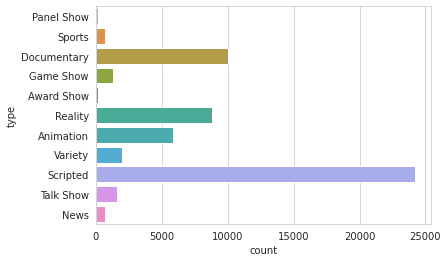

In [0]:
type_data = data.groupby('type').count()
display(type_data)
types_pandas = type_data.toPandas()
sns.set_style("whitegrid")
sns.barplot(data=types_pandas, x='count', y='type')

averageRuntime,count
29,180
26,215
65,648
191,3
222,2
270,1
54,235
19,66
113,15
112,12


Out[161]: <seaborn.axisgrid.FacetGrid at 0x7fa547b6d9a0>

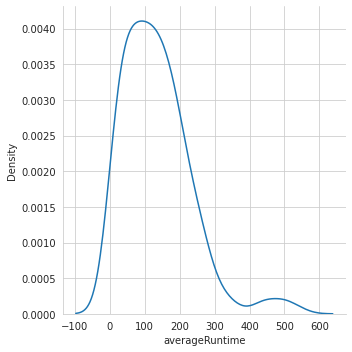

In [0]:
x_data = data.groupby('averageRuntime').count()
display(x_data)

pandas_df = x_data.toPandas()
sns.displot(data=pandas_df, kind="kde", x='averageRuntime')
